In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set_style(rc={'figure.figsize':(3.25,1), 'font.family':"Times New Roman",
                                  'font.size': 8, 'dpi': 300})

plots = "D:\Research\Spyder/plots" #"/home/djanke3/Documents/Spyder/plots/"

## Equal Passes, Noise at all weights

In [2]:
with open("PopulationNoiseResults_equalPasses2.json", 'r') as pn:
    data = {k:v for k,v in json.load(pn).items() if type(v) is not int}

with open("PopulationNoiseResults_equalPasses1.json", 'r') as pn:
    data.update({k:v for k,v in json.load(pn).items() if type(v) is not int}) # and int(k.split('_')[-1]) in [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]} # and k.split('_')[-1] in ['trial0', '0', '2', '4', '6', '8']}
#print(data.keys())

#print(data.keys())

def str_to_list(in_string):
    temp = in_string[1:-1].split(',')
    return [int(s) for s in temp]

score_num = 1
df = pd.DataFrame()
stats = {}
stats_combined = {}
for t,d in data.items():
    stats[t] = {}
    acc = d["accs"]
    
    scores = list(acc.values())
    scores = np.vstack([np.array(s) for s in scores])[score_num]
    
    stats[t]["medians"] = np.median(scores) * 100
    stats[t]["iqr"] = (np.quantile(scores, 0.75) - np.quantile(scores, 0.25)) * 100
    data[t] = d
    
    d["train"] = d["accs"]["train"]
    d["val"] = d["accs"]["val"]
    
    d["p"] = int(t.split("trial")[-1].split('_')[0])
    d["passes"] = int(t.split("trial")[-1].split('_')[1])
    
    stats[t]["p"] = d["p"]
    stats[t]["passes"] = d["passes"]
    
    stats_combined[t[:-2]] = stats_combined.get(t[:-2], {})
    stats_combined[t[:-2]]["p"] = d["p"]
    stats_combined[t[:-2]]["passes"] = d["passes"]
    stats_combined[t[:-2]]["accs"] = stats_combined[t[:-2]].get("accs", []) + list(scores)
    del d["accs"]
    del d["shape"]
    
    temp_df =  pd.DataFrame.from_dict(d, orient = "columns")
    df = pd.concat([df, temp_df], ignore_index = True)
    
for k,v in stats_combined.items():
    v["medians"] = np.median(v["accs"])
    v["iqr"] = np.quantile(v["accs"], 0.75) - np.quantile(v["accs"], 0.25)
    v["samples"] = len(v["accs"])
    del v["accs"]

In [9]:
yvars = ["medians", "iqr"]
ylabels = ["Median\nAccuracy (%)", "Inter-quartile\nRange (%)"]

acc_lim = [50, 82]
iqr_lim = [2, 15]

def plot_accuracies(y_num, data, noise):
    
    fig = plt.figure()
    fig.set_figheight(2.5)
    fig.set_figwidth(2.9)
    
    yvar = yvars[y_num]
    ylabel = ylabels[y_num]
    ylim = [acc_lim, iqr_lim][y_num]

    #title = None
    plt0 = sns.lineplot(x="passes", y = yvar, hue = "p", data = combo_df, palette = sns.color_palette("ch:dark=0.25", 5))
    plt.ylim(ylim)
    plt.ylabel(ylabel, labelpad = 0, fontsize=12)
    plt.xlabel("No. of Passes", labelpad=0, fontsize=12)
    plt0.tick_params(axis='both', which='major', pad=0)
    
    
    #plt.show()
            
    title = None
    
    if y_num == 0:
        location = "lower right"
        ncol = 3
    else:
        location = "upper right"
        ncol = 3

    plt.legend(ncol = ncol, loc=location,
                 borderaxespad=0., fancybox = False, edgecolor = 'black',
                 handlelength = 0.5, handletextpad = 0.5, columnspacing = 0.5)
    
    #plt.xticks(rotation=20)
    plt.yticks([y for y in range(ylim[0], ylim[1] + 1) if y % 5 == 0])
    plt.grid(True,axis = 'y')
    
        
    fig = plt0.get_figure()
    figname = plots + "VAD_popTrain_{}Noise_{}.pdf".format(noise, yvar)
    fig.savefig(figname, dpi=300, bbox_inches='tight')

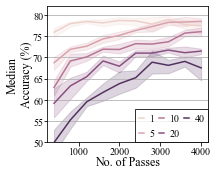

In [10]:
combo_df = pd.DataFrame.from_dict(stats, orient = "index")
combo_df = combo_df[combo_df["passes"] < 4001]

plot_accuracies(0, combo_df, "all")


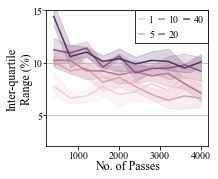

In [11]:
plot_accuracies(1, combo_df, "all")

## Equal Passes, Noise at Layer Inputs

In [12]:
with open("PopulationNoiseResults_inputNoise_equalPasses2.json", 'r') as pn:
    data = {k:v for k,v in json.load(pn).items() if type(v) is not int}

with open("PopulationNoiseResults_inputNoise_equalPasses1.json", 'r') as pn:
    data.update({k:v for k,v in json.load(pn).items() if type(v) is not int}) # and int(k.split('_')[-1]) in [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]} # and k.split('_')[-1] in ['trial0', '0', '2', '4', '6', '8']}
#print(data.keys())

#print(data.keys())

def str_to_list(in_string):
    temp = in_string[1:-1].split(',')
    return [int(s) for s in temp]

score_num = 1
df = pd.DataFrame()
stats = {}
stats_combined = {}
for t,d in data.items():
    stats[t] = {}
    acc = d["accs"]
    
    scores = list(acc.values())
    scores = np.vstack([np.array(s) for s in scores])[score_num]
    
    stats[t]["medians"] = np.median(scores) * 100
    stats[t]["iqr"] = (np.quantile(scores, 0.75) - np.quantile(scores, 0.25)) * 100
    data[t] = d
    
    d["train"] = d["accs"]["train"]
    d["val"] = d["accs"]["val"]
    
    d["p"] = int(t.split("trial")[-1].split('_')[0])
    d["passes"] = int(t.split("trial")[-1].split('_')[1])
    
    stats[t]["p"] = d["p"]
    stats[t]["passes"] = d["passes"]
    
    stats_combined[t[:-2]] = stats_combined.get(t[:-2], {})
    stats_combined[t[:-2]]["p"] = d["p"]
    stats_combined[t[:-2]]["passes"] = d["passes"]
    stats_combined[t[:-2]]["accs"] = stats_combined[t[:-2]].get("accs", []) + list(scores)
    del d["accs"]
    del d["shape"]
    
    temp_df =  pd.DataFrame.from_dict(d, orient = "columns")
    df = pd.concat([df, temp_df], ignore_index = True)
    
for k,v in stats_combined.items():
    v["medians"] = np.median(v["accs"])
    v["iqr"] = np.quantile(v["accs"], 0.75) - np.quantile(v["accs"], 0.25)
    v["samples"] = len(v["accs"])
    del v["accs"]

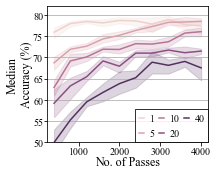

In [13]:
combo_df = pd.DataFrame.from_dict(stats, orient = "index")
combo_df = combo_df[combo_df["passes"] < 4001]

plot_accuracies(0, combo_df, "in")

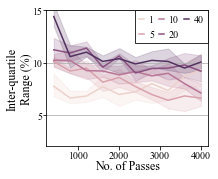

In [14]:
plot_accuracies(1, combo_df, "in")